In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
connection=sqlite3.connect('../../databases/nyc_shootings_db')

### Question 1: Total number of shootings reported in this dataset?

In [3]:
query='''SELECT COUNT(1) AS total_shootings
         FROM Shootings;'''

In [4]:
result=pd.read_sql_query(query,connection)

In [5]:
result

,total_shootings
0,8570


### There are 8570 shootings

### Question 2: How many shootings in each Borough

In [6]:
query='''SELECT i.BORO AS Borough, COUNT(1) AS Total_shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         GROUP BY 1
         ORDER BY 2;'''

In [7]:
result=pd.read_sql_query(query,connection)

In [8]:
result

,Borough,Total_shootings
0,Staten Island,227
1,Manhattan,1290
2,Queens,1315
3,Bronx,2626
4,Brooklyn,3112


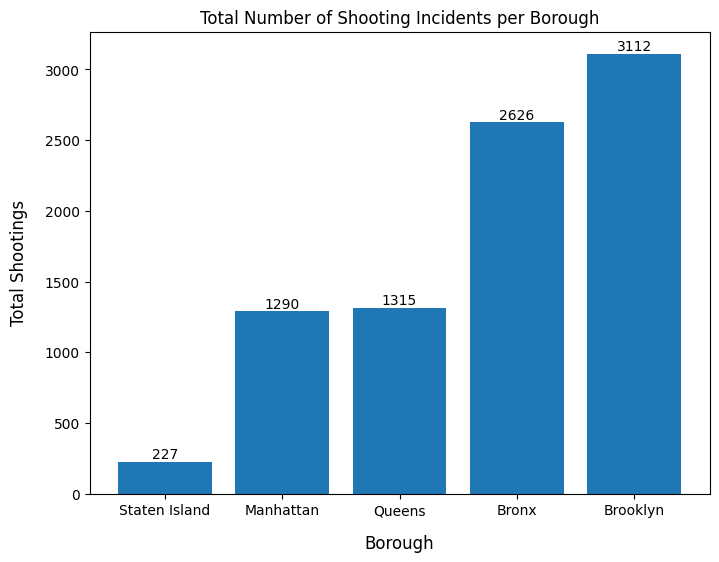

In [9]:
plt.figure(figsize=(8,6))
bars=plt.bar(result['Borough'].values,result['Total_shootings'].values)
plt.xlabel('Borough',fontsize=12,labelpad=12)
plt.ylabel('Total Shootings',fontsize=12,labelpad=12)
plt.title('Total Number of Shooting Incidents per Borough')
plt.bar_label(bars,label_type='edge')
plt.show()

### Question 2.1: What about each year?

In [10]:
query='''SELECT i.BORO AS Borough,strftime('%Y',i.OCCUR_DATE) AS Year, COUNT(1) AS Total_shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         GROUP BY 1,2
         '''

In [11]:
result=pd.read_sql_query(query,connection)

In [12]:
result

,Borough,Year,Total_shootings
0,Bronx,2017,306
1,Bronx,2018,313
2,Bronx,2019,267
3,Bronx,2020,504
4,Bronx,2021,701
5,Bronx,2022,535
6,Brooklyn,2017,357
7,Brooklyn,2018,365
8,Brooklyn,2019,372
9,Brooklyn,2020,819


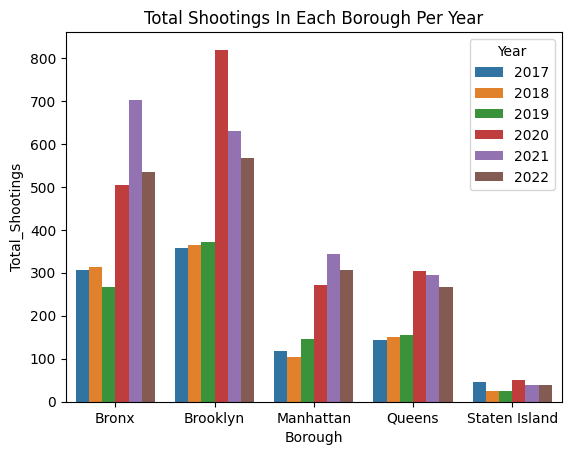

In [13]:
sns.barplot(data=result,x='Borough',y='Total_shootings',hue='Year')
plt.xlabel('Borough')
plt.ylabel('Total_Shootings')
plt.title('Total Shootings In Each Borough Per Year')
plt.show()

### Question 3: Which Year had the most shootings?

In [14]:
query='''SELECT strftime('%Y',i.OCCUR_DATE) AS Year, COUNT(1) AS Total_shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT 1;
         '''

In [15]:
result=pd.read_sql_query(query,connection)

In [16]:
result

,Year,Total_shootings
0,2021,2011


### 2021 had the most shootings with 2011

### Question 4: Trend of number of shootings

In [17]:
query='''SELECT strftime('%Y',i.OCCUR_DATE) AS Year, COUNT(1) AS Total_shootings
         FROM INCIDENTS AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         GROUP BY 1
         ORDER BY 1;
         '''

In [18]:
result=pd.read_sql_query(query,connection)

In [19]:
result

,Year,Total_shootings
0,2017,970
1,2018,958
2,2019,967
3,2020,1948
4,2021,2011
5,2022,1716


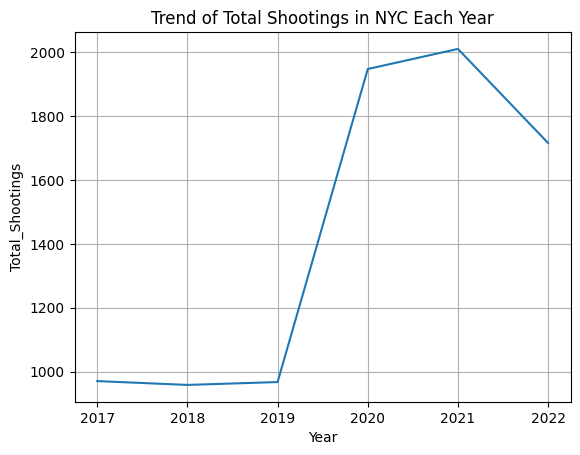

In [20]:
plt.plot(result.Year.values,result.Total_shootings.values)
plt.xlabel('Year')
plt.ylabel('Total_Shootings')
plt.title('Trend of Total Shootings in NYC Each Year')
plt.grid(True)
plt.show()

### In 2017-2019, the number of shootings was pretty constant being just below a 1,000. Then there was a huge spike in shootings in 2020 when the number of total shootings doubled. In 2021 there was a slight increase, and the shootings started dropping in 2022.

### My hypothesis for the drastic increase in shootings between 2019 and 2020 is due to the Covid pandemic that hit NYC in 2020. It matches the timeline and also Covid has settled down now in 2022 which can explain the dip in shootings in 2022.

### Question 5: 2022 Shootings Distribution in Time

In [21]:
query='''SELECT strftime('%H',i.OCCUR_TIME) AS Hour, COUNT(1) AS Total_shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
         GROUP BY 1'''

In [22]:
result=pd.read_sql_query(query,connection)

In [23]:
result

,Hour,Total_shootings
0,00,133
1,01,99
2,02,85
3,03,89
4,04,67
5,05,35
6,06,34
7,07,11
8,08,32
9,09,18


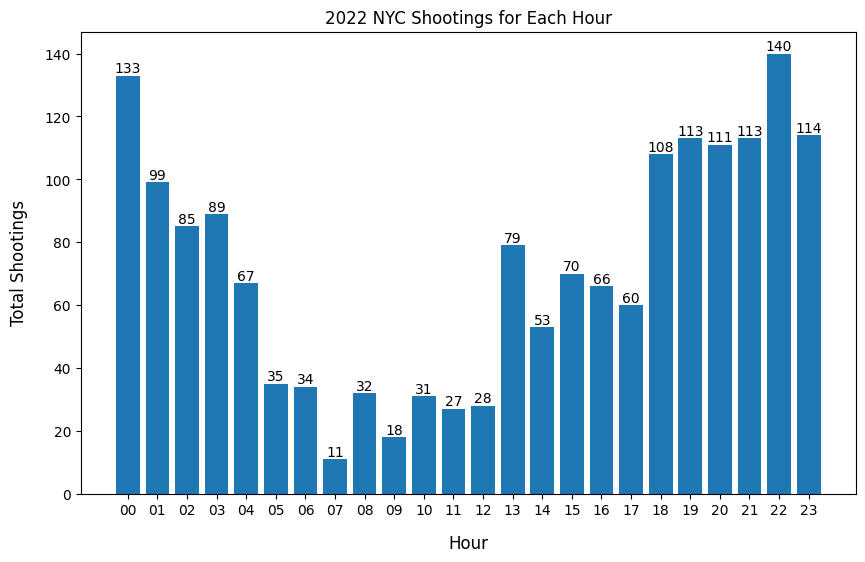

In [24]:
plt.figure(figsize=(10,6))
bars=plt.bar(result['Hour'].values,result['Total_shootings'].values)
plt.xlabel('Hour',fontsize=12,labelpad=12)
plt.ylabel('Total Shootings',fontsize=12,labelpad=12)
plt.title('2022 NYC Shootings for Each Hour')
plt.bar_label(bars,label_type='edge')
plt.show()

### Distribution of Victim By Race

In [25]:
query='''SELECT VIC_RACE, COUNT(1) AS Victim_count
         FROM Shootings
         GROUP BY 1
         ORDER BY 2 DESC;'''

In [26]:
result=pd.read_sql_query(query,connection)

In [27]:
result

,VIC_RACE,Victim_count
0,BLACK,6003
1,WHITE HISPANIC,1398
2,BLACK HISPANIC,797
3,WHITE,192
4,ASIAN / PACIFIC ISLANDER,170
5,UNKNOWN,8
6,AMERICAN INDIAN/ALASKAN NATIVE,2


### Distribution Of Victims By Age Group

In [28]:
query='''SELECT VIC_AGE_GROUP, COUNT(1) AS Victim_count
         FROM Shootings
         GROUP BY 1
         '''

In [29]:
result=pd.read_sql_query(query,connection)

In [30]:
result

,VIC_AGE_GROUP,Victim_count
0,18-24,2565
1,25-44,4525
2,45-64,748
3,65+,59
4,<18,662
5,UNKNOWN,11


In [31]:
row=result.loc[4]

In [32]:
result=result.drop(4)

In [33]:
result=pd.concat([row.to_frame().T,result],ignore_index=True)

In [34]:
result

,VIC_AGE_GROUP,Victim_count
0,<18,662
1,18-24,2565
2,25-44,4525
3,45-64,748
4,65+,59
5,UNKNOWN,11


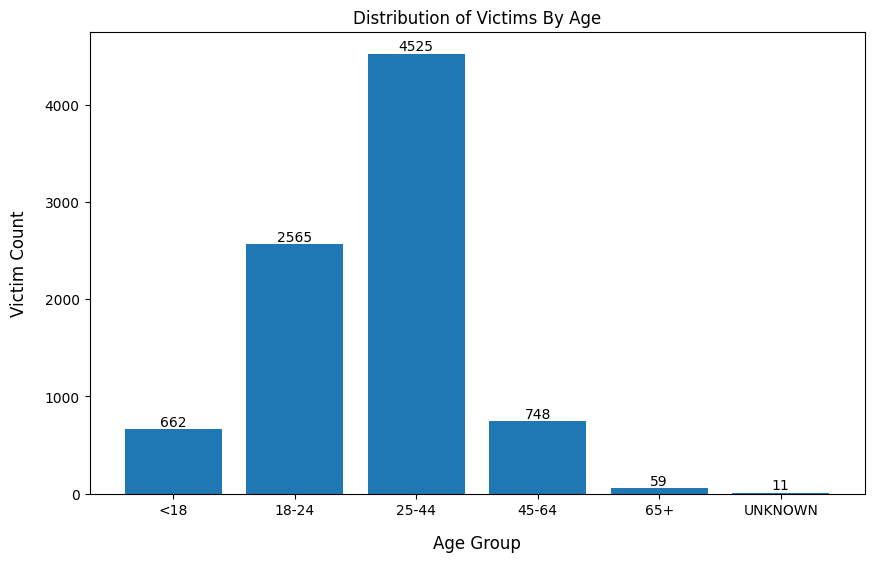

In [35]:
plt.figure(figsize=(10,6))
bars=plt.bar(result['VIC_AGE_GROUP'].values,result['Victim_count'].values)
plt.xlabel('Age Group',fontsize=12,labelpad=12)
plt.ylabel('Victim Count',fontsize=12,labelpad=12)
plt.title('Distribution of Victims By Age')
plt.bar_label(bars,label_type='edge')
plt.show()

### Distribution of Victim By Sex

In [36]:
query='''SELECT VIC_SEX, COUNT(1) AS Victim_Count
         FROM Shootings
         GROUP BY 1'''

In [37]:
result=pd.read_sql_query(query,connection)

In [38]:
result

,VIC_SEX,Victim_Count
0,F,897
1,M,7671
2,U,2


### Deadliest Incident

In [39]:
query='''SELECT i.INCIDENT_KEY,COUNT(1) AS Deaths
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         WHERE s.STATISTICAL_MURDER_FLAG==1
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT 1'''

In [40]:
result=pd.read_sql_query(query,connection)

In [41]:
result

,INCIDENT_KEY,Deaths
0,173354054,9


In [42]:
query='''WITH temp_1 AS (SELECT i.INCIDENT_KEY,COUNT(1) AS Deaths
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         WHERE s.STATISTICAL_MURDER_FLAG==1
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT 1)
      
    SELECT i.OCCUR_DATE,i.OCCUR_TIME,i.BORO,i.PRECINCT,(SELECT Deaths FROM temp_1) AS Total_Deaths,COUNT(1) AS Total_Casualties
    FROM Incidents AS i
    JOIN Shootings AS s
    ON i.INCIDENT_KEY=s.INCIDENT_KEY
    WHERE i.INCIDENT_KEY==(SELECT INCIDENT_KEY FROM temp_1 ) '''
         
        

In [43]:
result=pd.read_sql_query(query,connection)

In [44]:
result

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,Total_Deaths,Total_Casualties
0,2018-01-06,21:05:00,Bronx,47,9,18


### Overall number of Shootings for Each Month

In [45]:
query='''SELECT strftime('%m',i.OCCUR_DATE) AS Month, COUNT(1) AS Shooting_Count
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         GROUP BY 1'''

In [46]:
result=pd.read_sql_query(query,connection)

In [47]:
result

,Month,Shooting_Count
0,01,524
1,02,390
2,03,534
3,04,621
4,05,801
5,06,946
6,07,1096
7,08,986
8,09,795
9,10,679


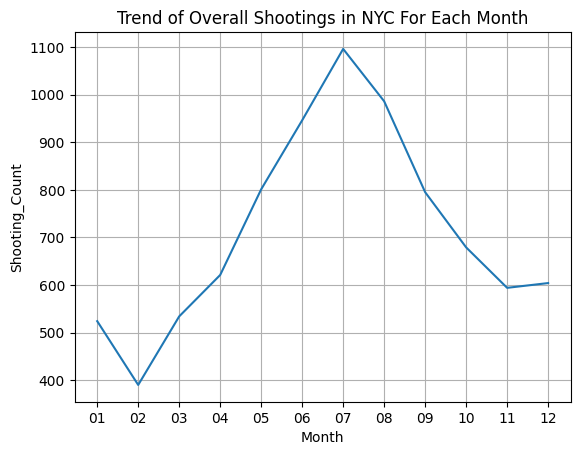

In [48]:
plt.plot(result.Month.values,result.Shooting_Count.values)
plt.xlabel('Month')
plt.ylabel('Shooting_Count')
plt.title('Trend of Overall Shootings in NYC For Each Month')
plt.grid(True)
plt.show()

### What about only for 2022? Will it have the same trend?

In [49]:
query='''SELECT strftime('%m',i.OCCUR_DATE) AS Month, COUNT(1) AS Shooting_Count
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
         GROUP BY 1'''

In [50]:
result=pd.read_sql_query(query,connection)

In [51]:
result

,Month,Shooting_Count
0,01,116
1,02,102
2,03,156
3,04,155
4,05,170
5,06,172
6,07,229
7,08,154
8,09,156
9,10,103


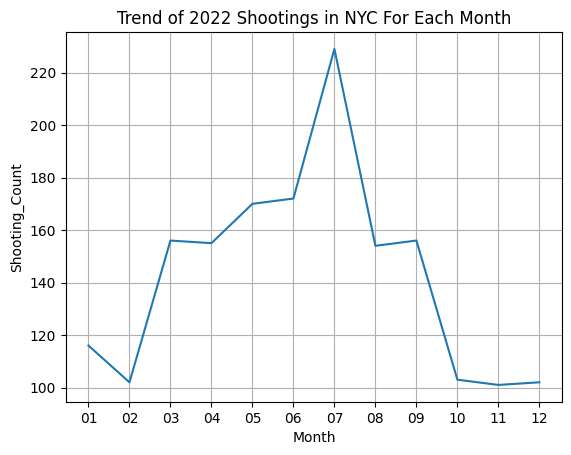

In [52]:
plt.plot(result.Month.values,result.Shooting_Count.values)
plt.xlabel('Month')
plt.ylabel('Shooting_Count')
plt.title('Trend of 2022 Shootings in NYC For Each Month')
plt.grid(True)
plt.show()

### Overall it follows the same trend

### By Borough

In [53]:
query='''SELECT strftime('%m',i.OCCUR_DATE) AS Month,i.BORO AS Borough, COUNT(1) AS Shooting_Count 
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
         GROUP BY 1,2
         ORDER BY 1,2'''

In [54]:
result=pd.read_sql_query(query,connection)

In [55]:
result

,Month,Borough,Shooting_Count
0,01,Bronx,42
1,01,Brooklyn,38
2,01,Manhattan,25
3,01,Queens,8
4,01,Staten Island,3
5,02,Bronx,36
6,02,Brooklyn,24
7,02,Manhattan,26
8,02,Queens,16
9,03,Bronx,50


### Which 5 Precinct had the most shootings overall

In [56]:
query='''SELECT i.PRECINCT, COUNT(1) AS Total_Shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT 5'''

In [57]:
result=pd.read_sql_query(query,connection)

In [58]:
result

,PRECINCT,Total_Shootings
0,75,469
1,73,426
2,44,363
3,40,319
4,67,318


### What about for 2022?

In [59]:
query='''SELECT i.PRECINCT, COUNT(1) AS Total_Shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT 5'''

In [60]:
result=pd.read_sql_query(query,connection)

In [61]:
result

,PRECINCT,Total_Shootings
0,75,87
1,73,80
2,48,72
3,44,71
4,40,71


### Demographics Of Victims and Perps in Each of These Precincts

In [62]:
query='''WITH Temp_Precincts AS(
         SELECT i.PRECINCT, COUNT(1) AS Total_Shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT 5)

    SELECT i.PRECINCT, s.VIC_AGE_GROUP, COUNT(1) AS COUNT
    FROM Incidents AS i
    JOIN Shootings AS s
    ON i.INCIDENT_KEY=s.INCIDENT_KEY
    WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
    GROUP BY 1,2
    HAVING i.PRECINCT IN (SELECT PRECINCT FROM Temp_Precincts)'''

In [63]:
result=pd.read_sql_query(query,connection)

In [64]:
result

,PRECINCT,VIC_AGE_GROUP,COUNT
0,40,18-24,22
1,40,25-44,32
2,40,45-64,5
3,40,65+,1
4,40,<18,11
5,44,18-24,9
6,44,25-44,47
7,44,45-64,10
8,44,<18,5
9,48,18-24,17


In [65]:
query='''WITH Temp_Precincts AS(
         SELECT i.PRECINCT, COUNT(1) AS Total_Shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT 5)
    SELECT i.PRECINCT, s.VIC_SEX, COUNT(1) AS COUNT
    FROM Incidents AS i
    JOIN Shootings AS s
    ON i.INCIDENT_KEY=s.INCIDENT_KEY
    WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
    GROUP BY 1,2
    HAVING i.PRECINCT IN (SELECT PRECINCT FROM Temp_Precincts)'''

In [66]:
result=pd.read_sql_query(query,connection)

In [67]:
result

,PRECINCT,VIC_SEX,COUNT
0,40,F,6
1,40,M,65
2,44,F,6
3,44,M,65
4,48,F,7
5,48,M,65
6,73,F,6
7,73,M,74
8,75,F,11
9,75,M,76


In [68]:
query='''WITH Temp_Precincts AS(
         SELECT i.PRECINCT, COUNT(1) AS Total_Shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT 5)
         
    SELECT i.PRECINCT, s.VIC_RACE, COUNT(1) AS COUNT
    FROM Incidents AS i
    JOIN Shootings AS s
    ON i.INCIDENT_KEY=s.INCIDENT_KEY
    WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
    GROUP BY 1,2
    HAVING i.PRECINCT IN (SELECT PRECINCT FROM Temp_Precincts)'''

In [69]:
result=pd.read_sql_query(query,connection)

In [70]:
result

,PRECINCT,VIC_RACE,COUNT
0,40,AMERICAN INDIAN/ALASKAN NATIVE,1
1,40,BLACK,40
2,40,BLACK HISPANIC,4
3,40,WHITE HISPANIC,26
4,44,BLACK,35
5,44,BLACK HISPANIC,16
6,44,WHITE HISPANIC,20
7,48,BLACK,42
8,48,BLACK HISPANIC,15
9,48,WHITE HISPANIC,15


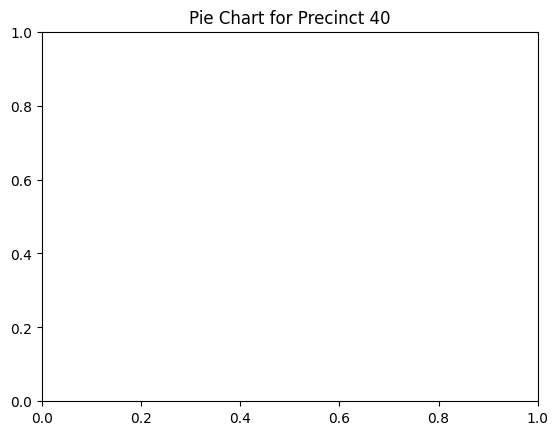

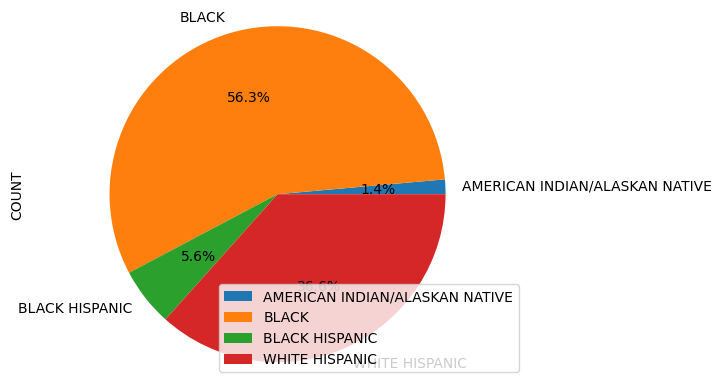

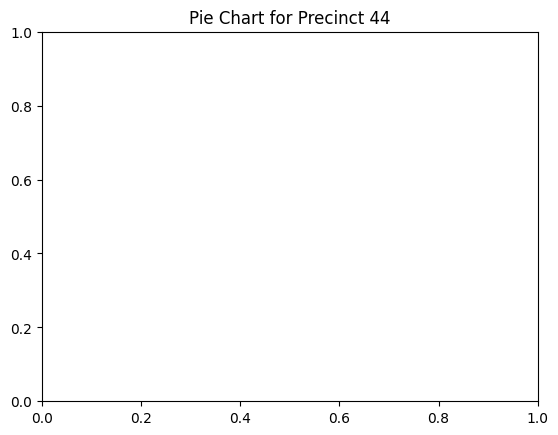

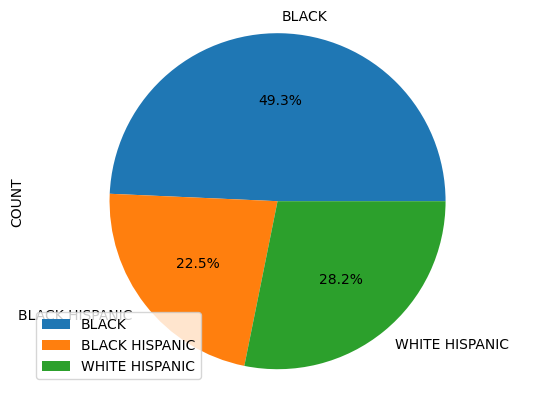

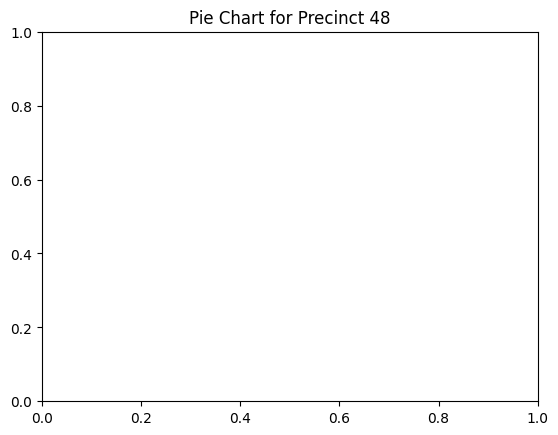

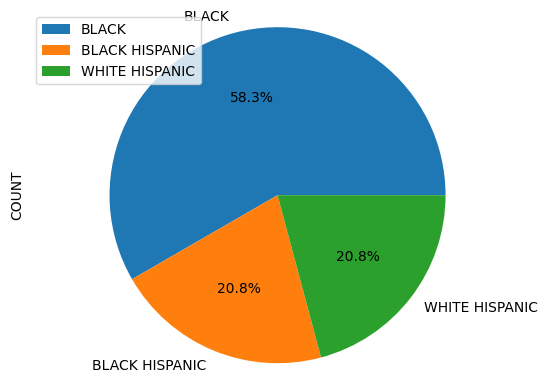

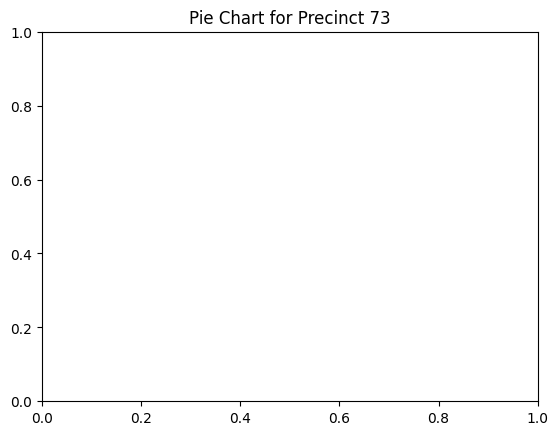

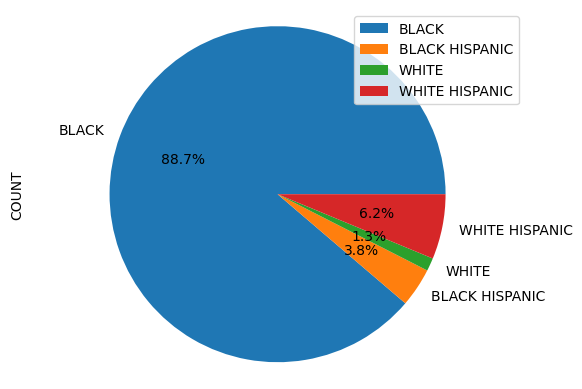

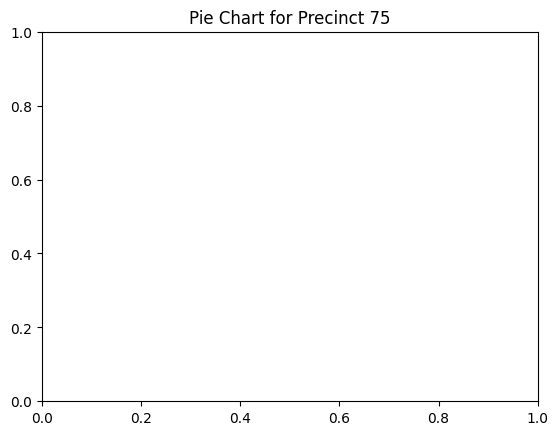

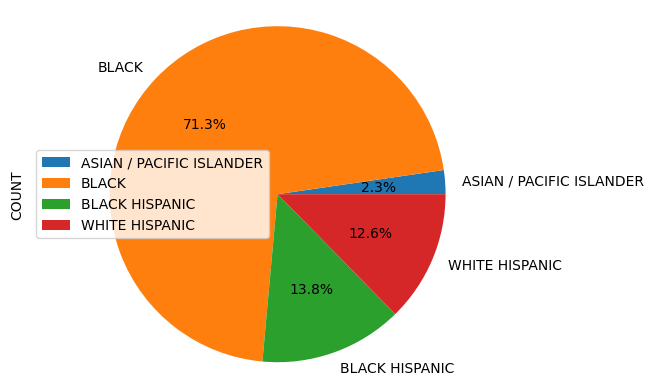

In [71]:
grouped = result.groupby('PRECINCT')

# Create a pie chart for each precinct
for precinct, group in grouped:
    plt.figure()
    plt.title(f'Pie Chart for Precinct {precinct}')
    group.plot(kind='pie', y='COUNT', labels=group['VIC_RACE'], autopct='%1.1f%%')
    plt.axis('equal')

# Show all the pie charts
plt.show()

In [72]:
connection.close()